In [19]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
import nltk

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [22]:
url = 'https://finviz.com/quote.ashx?t=AAPL'


In [23]:
news_tables = {}


In [24]:
 req = Request(url=url, headers={'user-agent': 'my-app'})

In [25]:
response = urlopen(req)
print(response)

In [26]:
html = BeautifulSoup(response, features='html.parser')
print(html)

<!DOCTYPE html>

<html lang="en">
<head>
<title>AAPL Apple Inc. Stock Quote</title>
<meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=1024" name="viewport"/><meta content="Stock screener for investors and traders, financial visualizations." name="description"/>
<meta content="Stock Screener, Charts, Quotes, Maps, News, Financial Visualizations, Research, Trading Systems" name="keywords"/>
<link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-regular.woff2" rel="preload"/>
<link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-700.woff2" rel="preload"/>
<link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-900.woff2" rel="preload"/>
<link as="font" crossorigin="" href="/fonts/inter-latin.woff2" rel="preload"/>
<link href="/assets/dist/finviz.f6728ad6.css" rel="stylesheet" type="text/css"/>
<link href="/assets/dist/main.86fcafbe.css" rel="stylesheet" type="text/css"/>
<link href="/favicon_2x.png"

In [27]:
news_table = html.find(id="news-table")
news_tables['AAPL'] = news_table

In [28]:
print(news_tables)

{'AAPL': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">May-22-22 08:15AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.fool.com/investing/2022/05/22/if-you-invested-1000-in-apple-in-2010-this-is-how/?source=eptyholnk0000202&amp;utm_source=yahoo-host&amp;utm_medium=feed&amp;utm_campaign=article" target="_blank">If You Invested $1,000 in Apple in 2010, This Is How Much You Would Have Today</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Motley Fool</span></div></div></td></tr>
<tr><td align="right" width="130">07:00AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.fool.com/investing/2022/05/22/3-stocks-down-more-than-75-to-buy-right-now/?source=eptyholnk0000202&amp;utm_source=

In [29]:
# manipulating finviz data 

In [30]:
news_rows= news_table.findAll('tr')
news_rows

[<tr><td align="right" style="white-space:nowrap" width="130">May-22-22 08:15AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.fool.com/investing/2022/05/22/if-you-invested-1000-in-apple-in-2010-this-is-how/?source=eptyholnk0000202&amp;utm_source=yahoo-host&amp;utm_medium=feed&amp;utm_campaign=article" target="_blank">If You Invested $1,000 in Apple in 2010, This Is How Much You Would Have Today</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Motley Fool</span></div></div></td></tr>,
 <tr><td align="right" width="130">07:00AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.fool.com/investing/2022/05/22/3-stocks-down-more-than-75-to-buy-right-now/?source=eptyholnk0000202&amp;utm_source=yahoo-host&amp;utm_medium=feed&amp;utm_campaign=article" target="_blank">3 Stocks Down More Than 75% to Buy Right 

In [31]:
#to get the information from the article 
for index,row in enumerate (news_rows):
    title=row.a.text
    timestamp=row.td.text
    print (timestamp,' ',title)
    

May-22-22 08:15AM     If You Invested $1,000 in Apple in 2010, This Is How Much You Would Have Today
07:00AM     3 Stocks Down More Than 75% to Buy Right Now
03:00AM     After Meltdown, Tech-Bottom Signals Have Yet to Scream Buy Now
02:34AM     How Airbnb Is Giving Power to Its People
May-21-22 04:13PM     Dow Jones Futures: Market Correction Getting Worse, Tesla Breaks Down; What You Must Do Now
01:51PM     Better Buy: Apple vs. Alphabet
01:05PM     Apple Looks Closer at India and Vietnam to Boost Production: Report
12:44PM     Investors still love Cathie Wood, but hate the best-performing sector of the year
08:30AM     Why It Might Be a Lucrative Time to Buy Spotify Stock
08:05AM     Is Unity Software's Growth Slowdown a Permanent Problem?
May-20-22 04:53PM     Megacap tech stocks suffered the most under this week's sell-off
04:31PM     McDonald's Is Exiting Russia. Will Other Restaurants Follow?
04:09PM     Apple iPhone Supply Chain Proving 'Surprisingly Resilient,' Analyst Says
03:

In [32]:
parsed_data = []
for index,row in enumerate (news_rows):
    title=row.a.text
    date_data = row.td.text.split(' ')
    if len(date_data) == 1:
            time = date_data[0]
    else:
            date = date_data[0]
            time = date_data[1]
    parsed_data.append(['AAPL', date, time, title])

In [33]:
print(parsed_data)

[['AAPL', 'May-22-22', '08:15AM\xa0\xa0', 'If You Invested $1,000 in Apple in 2010, This Is How Much You Would Have Today'], ['AAPL', 'May-22-22', '07:00AM\xa0\xa0', '3 Stocks Down More Than 75% to Buy Right Now'], ['AAPL', 'May-22-22', '03:00AM\xa0\xa0', 'After Meltdown, Tech-Bottom Signals Have Yet to Scream Buy Now'], ['AAPL', 'May-22-22', '02:34AM\xa0\xa0', 'How Airbnb Is Giving Power to Its People'], ['AAPL', 'May-21-22', '04:13PM\xa0\xa0', 'Dow Jones Futures: Market Correction Getting Worse, Tesla Breaks Down; What You Must Do Now'], ['AAPL', 'May-21-22', '01:51PM\xa0\xa0', 'Better Buy: Apple vs. Alphabet'], ['AAPL', 'May-21-22', '01:05PM\xa0\xa0', 'Apple Looks Closer at India and Vietnam to Boost Production: Report'], ['AAPL', 'May-21-22', '12:44PM\xa0\xa0', 'Investors still love Cathie Wood, but hate the best-performing sector of the year'], ['AAPL', 'May-21-22', '08:30AM\xa0\xa0', 'Why It Might Be a Lucrative Time to Buy Spotify Stock'], ['AAPL', 'May-21-22', '08:05AM\xa0\xa0'

In [34]:
# applying sentiment analysis : take every title and apply sentiment analysis 

In [37]:
df = pd.DataFrame(parsed_data, columns=['AAPL', 'date', 'time', 'title'])
df.head()

,AAPL,date,time,title
0,AAPL,May-22-22,08:15AM,"If You Invested $1,000 in Apple in 2010, This ..."
1,AAPL,May-22-22,07:00AM,3 Stocks Down More Than 75% to Buy Right Now
2,AAPL,May-22-22,03:00AM,"After Meltdown, Tech-Bottom Signals Have Yet t..."
3,AAPL,May-22-22,02:34AM,How Airbnb Is Giving Power to Its People
4,AAPL,May-21-22,04:13PM,Dow Jones Futures: Market Correction Getting W...


In [36]:
vader = SentimentIntensityAnalyzer()

In [40]:
print(vader.polarity_scores("I don't think apple is a good company.I think they will do badly." )) # coumpoud between -1 and 1

{'neg': 0.207, 'neu': 0.6, 'pos': 0.193, 'compound': -0.0516}


In [42]:
f = lambda title: vader.polarity_scores(title)['compound'] # lambda fct and i onlt care about coumpound 
df['compound'] = df['title'].apply(f) # apply the fct f on my df specifically titles
df.head()

,AAPL,date,time,title,compound
0,AAPL,May-22-22,08:15AM,"If You Invested $1,000 in Apple in 2010, This ...",0.0000
1,AAPL,May-22-22,07:00AM,3 Stocks Down More Than 75% to Buy Right Now,0.0000
2,AAPL,May-22-22,03:00AM,"After Meltdown, Tech-Bottom Signals Have Yet t...",-0.4019
3,AAPL,May-22-22,02:34AM,How Airbnb Is Giving Power to Its People,0.3400
4,AAPL,May-21-22,04:13PM,Dow Jones Futures: Market Correction Getting W...,-0.4767


In [43]:
# visualizing sentiment analysis 

In [44]:
df['date'] = pd.to_datetime(df.date).dt.date

<Figure size 720x576 with 0 Axes>

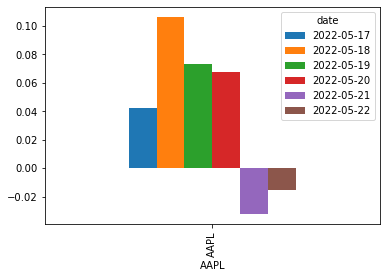

In [45]:
plt.figure(figsize=(10,8))
mean_df = df.groupby(['AAPL', 'date']).mean().unstack() # the groupby will return me a dataframe
mean_df = mean_df.xs('compound', axis="columns")
mean_df.plot(kind='bar')
plt.show()